<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo55-alex-edgar/blob/main/Reto_CienciaAnalisisDatos_Equipo55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto: Ciencia y Análisis de Datos
# Pt1. Limpieza, análisis, visualización y kmeans
# Equipo 55

## Alejandro Juarez Corona A01168444
## Edgar López Valdés A01339939


### Instrucciones

* Limpieza de base de datos.
* Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
  * Identificando tendencias centrales promedio, media y mediana de los datos. 
  * Identificar medidas de dispersión, máximo, mínimo .
  * Identificar medidas de posición no centrales , los cuartiles, outliers.   
  * Identificar correlaciones.
* Preparar los datos 
* Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
* Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

### Se trabaja con el la base de datos de Aguas Profundas 



In [228]:
# Importacion de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
# Obteniendo los datos
original = pd.read_csv('DatabaseAguasSubterraneas2020.csv', encoding='latin1')
df = pd.read_csv('DatabaseAguasSubterraneas2020.csv', encoding='latin1')
df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [230]:
# Checking the description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [231]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


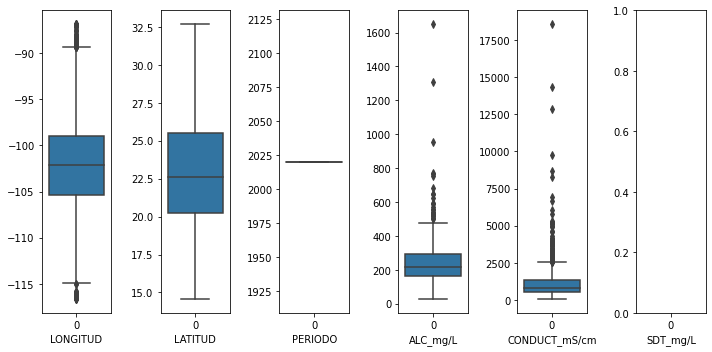

In [232]:
# Plotting the variables bloxplots
plt.rcParams["figure.figsize"] = [10.00, 5.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 6)
# Numeric data
df_num = df._get_numeric_data() 
for (index, col) in enumerate(df_num.columns.values):
  sns.boxplot(data = df_num[col], ax = axes[index]).set(xlabel=col)

### From the boxplots and the information from the dataframe we can observe that Periodo and SDT_mg/L do not proportionate useful information, we suggest dropping this columns

In [233]:
df.drop(['PERIODO','SDT_mg/L'], axis=1, inplace=True)
columns = df.columns.values

### We observe many rows have a '<' symbol. We can take it out so we can transform the column to numeric

In [234]:
# Checking for original numeric columns
or_col_num = df._get_numeric_data().columns.values
print("Original Numeric Columns:",or_col_num)

# Replacing symbols not allowing conversion
df.replace({'<':''}, regex=True, inplace=True)
columns = df.columns.values
for col in columns:
  try:
    df[col] = df[col].astype('float')
  except:
    pass
print("New Numeric Columns:",df._get_numeric_data().columns.values)

Original Numeric Columns: ['LONGITUD' 'LATITUD' 'ALC_mg/L' 'CONDUCT_mS/cm']
New Numeric Columns: ['LONGITUD' 'LATITUD' 'ALC_mg/L' 'CONDUCT_mS/cm' 'SDT_M_mg/L'
 'FLUORUROS_mg/L' 'DUR_mg/L' 'COLI_FEC_NMP/100_mL' 'N_NO3_mg/L'
 'AS_TOT_mg/L' 'CD_TOT_mg/L' 'CR_TOT_mg/L' 'HG_TOT_mg/L' 'PB_TOT_mg/L'
 'MN_TOT_mg/L' 'FE_TOT_mg/L']


In [235]:
print("Original numeric columns:",len(or_col_num))
print("New numeric columns:",len(df._get_numeric_data().columns.values))

Original numeric columns: 4
New numeric columns: 16


### Now we can create new boxplots

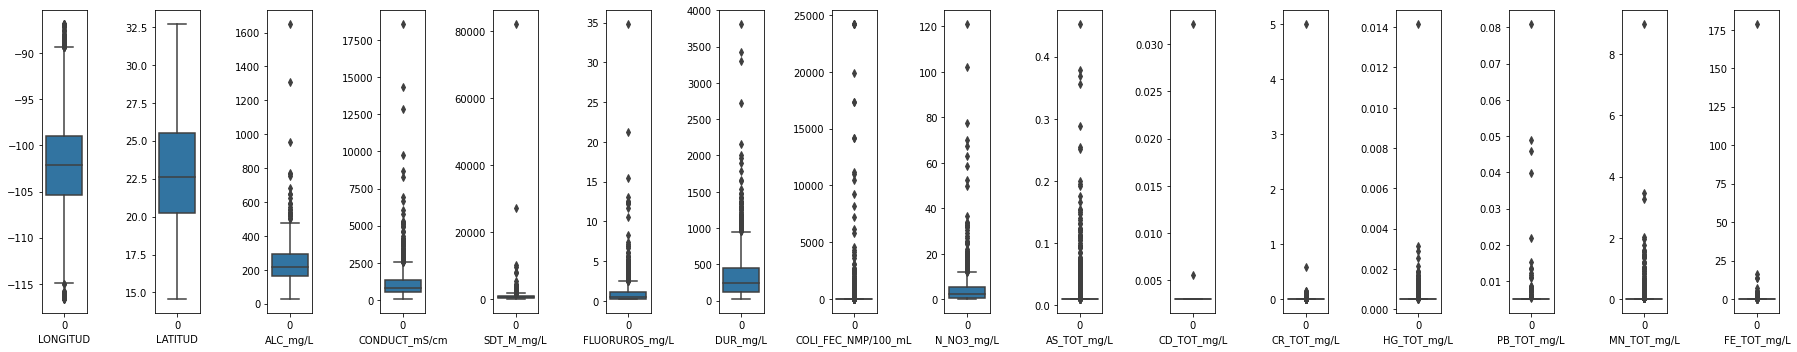

In [236]:
# Plotting the variables bloxplots
plt.rcParams["figure.figsize"] = [25.00, 5.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 16)
# Numeric data
df_num = df._get_numeric_data() 
for (index, col) in enumerate(df_num.columns.values):
  sns.boxplot(data = df_num[col], ax = axes[index]).set(xlabel=col)

### We can proceed to check for nan or null data



In [237]:
# Replacing all empty strings as NaN
df.replace('',np.nan)
# Checking for NaN in database
df.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/L             False
CALIDAD_PB

In [238]:
df1 = df.copy()

df1.dropna(inplace=True)

rows_df = df.shape[0]
rows_df1 = df1.shape[0]

# If we only decide to drop all rows with at least an empty value we would lose a lot of rows
print("Rows lost if dropping for any NaN:",rows_df-rows_df1)

# Dropping rows like that is not a good decision

Rows lost if dropping for any NaN: 441


### Separamos nuestra variable de salida e imputamos los valores vacios con la media

### Un trabajo más avanzado podría ser separar según el valor de SEMAFORO, y obtener la moda, mediana o media de cada categoría para esa columna y usarla para reemplazar ese dato


In [239]:
y = df[['SEMAFORO']]
y


,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


In [240]:
# Verificamos que ninguna salida esté vacía
y.isnull().any()

SEMAFORO    False
dtype: bool

In [241]:
# Definimos las variables de entrada
df_ok = df.drop(['SEMAFORO'], axis=1)._get_numeric_data()
df_ok

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910
1,-102.20075,21.99958,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500
2,-102.28801,22.36685,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500
3,-102.29449,22.18435,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500
4,-110.24480,23.45138,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
1064,-99.70099,24.78280,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578
1065,-99.82249,25.55197,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290
1066,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860


In [242]:
# Verificamos si hay datos vacíos en nuestras entradas
df_ok.isna().any()

LONGITUD               False
LATITUD                False
ALC_mg/L                True
CONDUCT_mS/cm           True
SDT_M_mg/L              True
FLUORUROS_mg/L         False
DUR_mg/L                True
COLI_FEC_NMP/100_mL    False
N_NO3_mg/L              True
AS_TOT_mg/L            False
CD_TOT_mg/L            False
CR_TOT_mg/L            False
HG_TOT_mg/L            False
PB_TOT_mg/L            False
MN_TOT_mg/L            False
FE_TOT_mg/L            False
dtype: bool

In [243]:
# Reemplazaremos los datos con la media de la columna

col_ok = df_ok.columns.values
for col in col_ok:
  mean = df_ok[col].mean()
  df_ok[col].replace(np.nan,mean, inplace=True)


In [244]:
# Now check again for rows with null data
df_ok.isna().any()

LONGITUD               False
LATITUD                False
ALC_mg/L               False
CONDUCT_mS/cm          False
SDT_M_mg/L             False
FLUORUROS_mg/L         False
DUR_mg/L               False
COLI_FEC_NMP/100_mL    False
N_NO3_mg/L             False
AS_TOT_mg/L            False
CD_TOT_mg/L            False
CR_TOT_mg/L            False
HG_TOT_mg/L            False
PB_TOT_mg/L            False
MN_TOT_mg/L            False
FE_TOT_mg/L            False
dtype: bool

### We proceed to graph the correlations

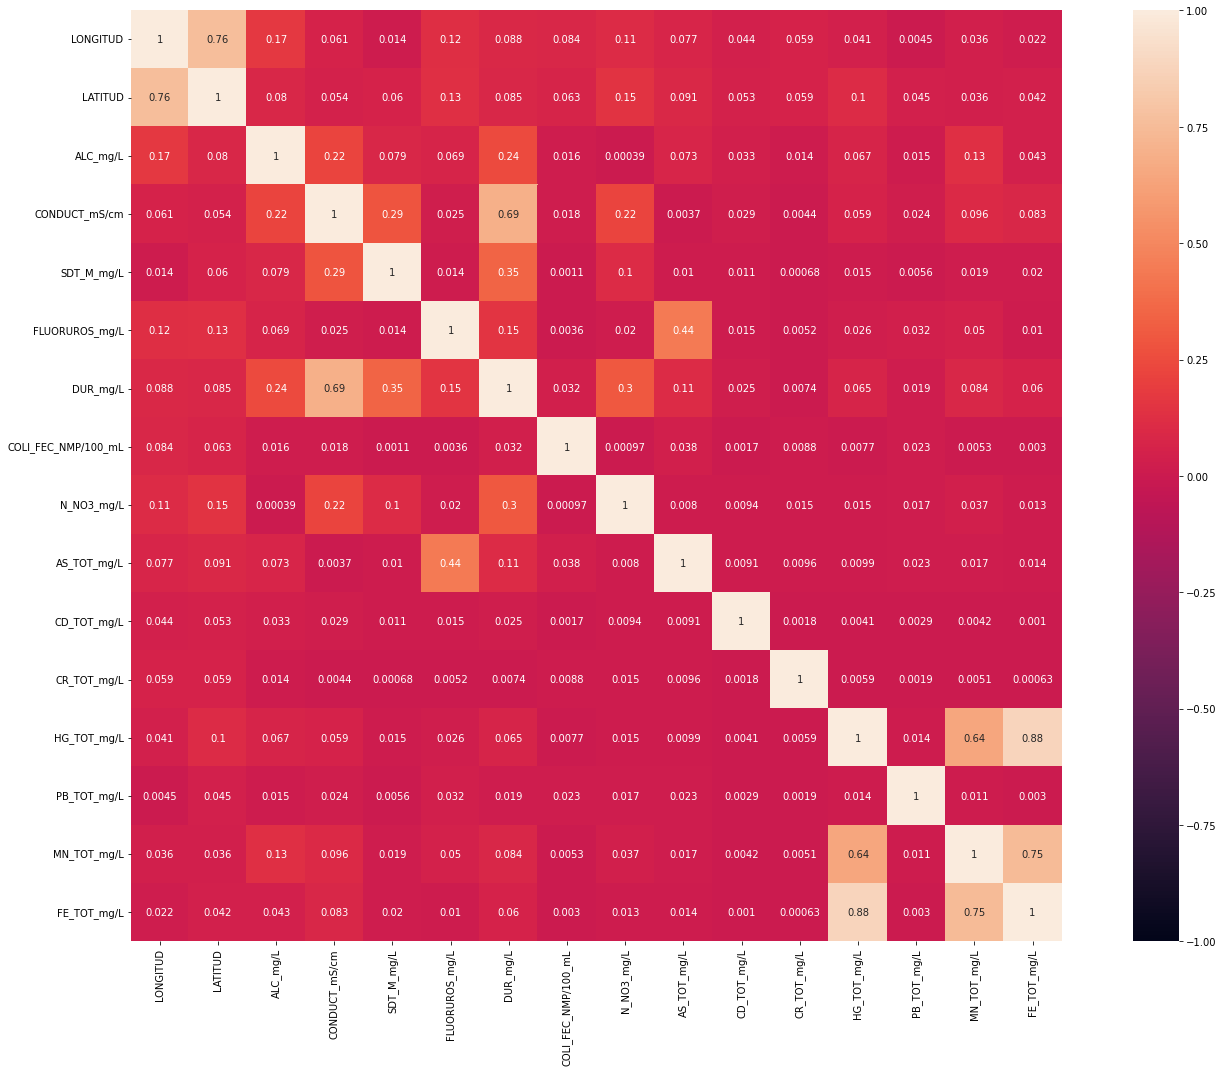

In [245]:
corr = df_ok.corr().abs() 
# Usamos abs para eliminar correlaciones negativas
f, axes = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corr, vmax = 1, vmin = -1, square = True, annot = True)

### Los datos están listos para ser usados

In [246]:
df_ok.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,235.633759,1138.953013,896.101567,1.075600,347.938073,355.490356,4.319759,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387
std,6.703263,3.887670,116.655014,1242.056683,2748.950627,1.924278,359.500870,2052.457014,8.341222,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974
min,-116.664250,14.561150,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
25%,-105.388865,20.212055,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
50%,-102.174180,22.617190,215.825000,822.500000,551.400000,0.503500,245.662350,1.100000,2.082916,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960
75%,-98.974716,25.510285,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380
max,-86.864120,32.677713,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


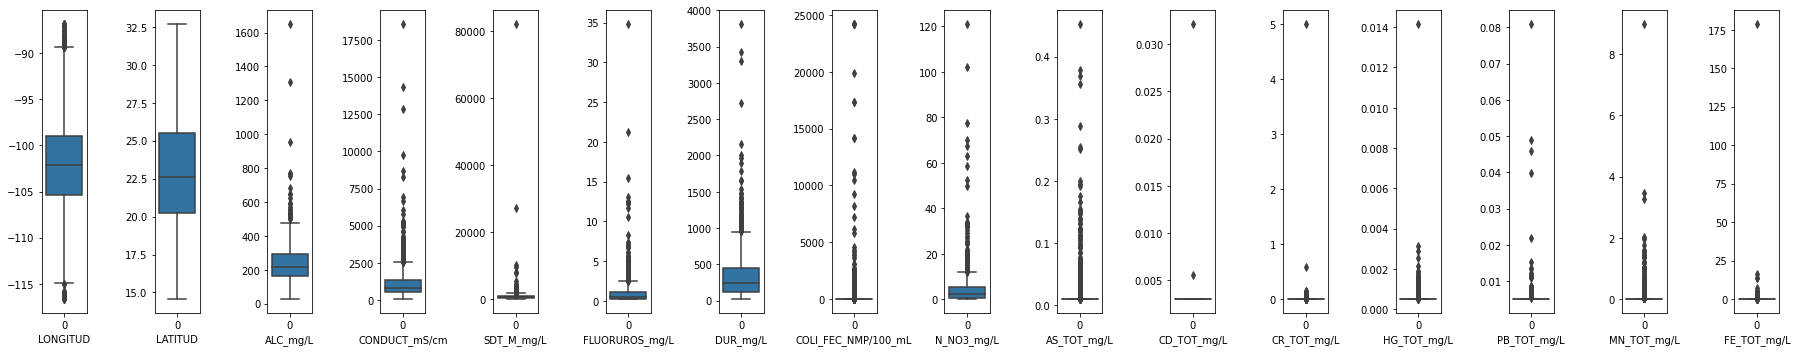

In [247]:
# Plotting the variables bloxplots
plt.rcParams["figure.figsize"] = [25.00, 5.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 16)
# Numeric data
df_num = df_ok._get_numeric_data() 
for (index, col) in enumerate(df_num.columns.values):
  sns.boxplot(data = df_num[col], ax = axes[index]).set(xlabel=col)

### Desde aquí podemos usar 
  * 'df_ok': dataset para el modelo
  * 'y': variable de salida